
## **Ames House Price Prediction**

### **Cleaning Test data**

This is a continuation of the Ames House price prediction project. Here, the test data will be preprocessed and then the models will be built.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
sns.set_palette("Set2")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
train_df= pd.read_csv('cleaned_train_data.csv')
test = pd.read_csv('test.csv')

In [4]:
train_df.shape, test.shape

((1460, 148), (1459, 80))

In [5]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
test_num= test.select_dtypes(exclude=['object']).drop(['Id', 'MSSubClass'], axis= 1)
test_numeric= test_num.copy()

test_category= test.select_dtypes(include=['object'])
test_cat= test_category.copy()
test_cat['MSSubClass']= test['MSSubClass'].astype(str)

Text(0.5, 1.0, 'Distribution of missing values in the test set')

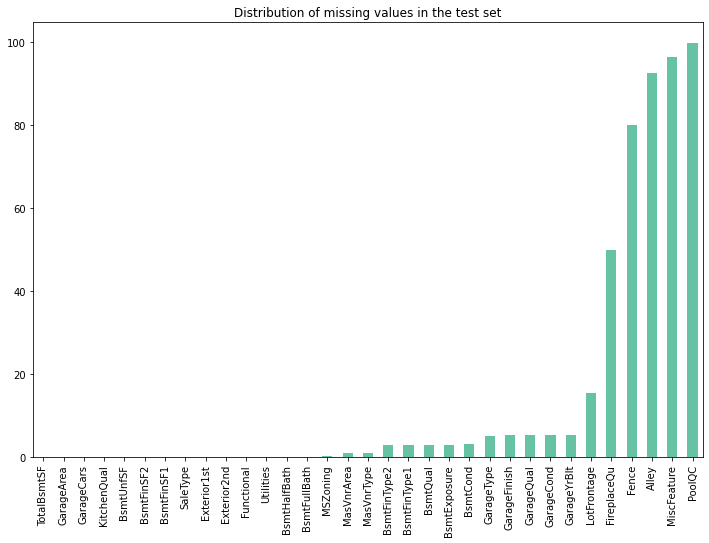

In [7]:
# Missing values
f = plt.figure(figsize=(12, 8))
missing_values = test.isnull().sum()/len(train_df) * 100
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.title('Distribution of missing values in the test set')

Some features have missing values in the test set as opposed to the train set. They will be inputed based on the type of variable.

In [8]:
# Ordinal categories

ordinal_cat_features= ['LotShape', 'Utilities','LandSlope','ExterQual','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
                       'BsmtFinType2','HeatingQC', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu',
                       'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'CentralAir', 'ExterCond']

test_cat['LotShape'] = test_cat['LotShape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 2, 'IR3': 1})
test_cat['Utilities'] = test_cat['Utilities'].replace({'AllPub': 2, 'NoSeWa': 1})
test_cat['LandSlope'] = test_cat['LandSlope'].replace({'Gtl': 3, 'Mod': 2, 'Sev': 1})
test_cat['ExterQual'] = test_cat['ExterQual'].replace({'Gd': 3, 'TA': 2, 'Ex': 4, 'Fa': 1})
test_cat['BsmtQual'] = test_cat['BsmtQual'].replace({'Gd': 3, 'TA': 2, 'Ex': 4, 'Fa': 1})
test_cat['BsmtCond'] = test_cat['BsmtCond'].replace({'TA':3, 'Gd':4, 'Fa':2, 'Po': 1})
test_cat['BsmtExposure'] = test_cat['BsmtExposure'].replace({'No': 1,  'Gd': 4, 'Mn': 2, 'Av': 3})
test_cat['BsmtFinType1'] = test_cat['BsmtFinType1'].replace({'GLQ': 3, 'ALQ': 2,  'Unf': 1, 'Rec': 2, 'BLQ': 1, 'LwQ': 1})
test_cat['BsmtFinType2'] = test_cat['BsmtFinType2'].replace({'GLQ': 3, 'ALQ': 2,  'Unf': 1, 'Rec': 2, 'BLQ': 1, 'LwQ': 1})
test_cat['HeatingQC'] = test_cat['HeatingQC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
test_cat['Electrical'] = test_cat['Electrical'].replace({'SBrkr': 4, 'FuseF': 2, 'FuseA': 3, 'FuseP': 1, 'Mix': 3 })
test_cat['KitchenQual'] = test_cat['KitchenQual'].replace({'Gd':3, 'TA': 2, 'Ex': 4, 'Fa': 1})
test_cat['Functional'] = test_cat['Functional'].replace({'Typ': 4, 'Min1': 3, 'Maj1': 2, 'Min2': 3,  'Mod': 3, 'Maj2': 2, 'Sev': 1})
test_cat['FireplaceQu'] = test_cat['FireplaceQu'].replace({'TA': 2, 'Gd': 3, 'Fa': 2, 'Ex': 4,  'Po': 1})

test_cat['GarageType'] = test_cat['GarageType'].replace({'Attchd':2, 'Detchd': 1, 'BuiltIn': 2, 'CarPort': 1, 'Basment': 2, '2Types': 2})

test_cat['GarageFinish'] = test_cat['GarageFinish'].replace({'RFn':2,  'Unf':1, 'Fin': 3})

test_cat['GarageQual'] = test_cat['GarageQual'].replace({'TA': 3, 'Fa': 2, 'Gd': 4, 'Ex': 5, 'Po': 1})
test_cat['GarageCond'] = test_cat['GarageCond'].replace({'TA': 3, 'Fa': 2, 'Gd': 4, 'Ex': 5, 'Po': 1})
test_cat['PavedDrive'] = test_cat['PavedDrive'].replace({'Y': 3, 'N': 1, 'P': 2})
test_cat['PoolQC'] = test_cat['PoolQC'].replace({'Ex':3, 'Fa': 2, 'Gd':1})
test_cat['Fence'] = test_cat['Fence'].replace({'MnPrv': 3, 'GdWo':2, 'GdPrv': 4, 'MnWw': 1})
test_cat['CentralAir'] = test_cat['CentralAir'].replace({'Y': 1, 'N': 0})
test_cat['ExterCond'] = test_cat['ExterCond'].replace({'TA': 3, 'Gd': 4, 'Fa': 2, 'Ex': 5, 'Po': 1})

#### **Preprocessing**

##### **Data Cleaning**

In [9]:
test_numeric['LotFrontage'] = test_numeric['LotFrontage'].fillna(test_numeric['LotFrontage'].median())
test_numeric['MasVnrArea'] = test_numeric['MasVnrArea'].fillna(test_numeric['MasVnrArea'].median())
test_numeric['GarageYrBlt'] = test_numeric['GarageYrBlt'].fillna(0)
test_numeric= test_numeric.fillna(0)

test_cat[ordinal_cat_features]= test_cat[ordinal_cat_features].fillna(0)

nominal_features= ['MSZoning', 'Exterior1st', 'Exterior2nd', 'SaleType']

test_cat[nominal_features]= test_cat[nominal_features].fillna(0)

test_cat['MasVnrType'] = test_cat['MasVnrType'].fillna(test_cat['MasVnrType'].mode()[0])

##### **Feature Engineering**

##### **Generating new features**

In [10]:
test_numeric["LivLotRatio"] = test_numeric["GrLivArea"] / test_numeric["LotArea"]
test_numeric["Spaciousness"] = (test_numeric["1stFlrSF"] + test_numeric["2ndFlrSF"]) / test_numeric["TotRmsAbvGrd"]
test_numeric["TotalOutsideSF"] = test_numeric['WoodDeckSF'] + test_numeric['OpenPorchSF'] + test_numeric['EnclosedPorch'] + test_numeric["3SsnPorch"] + test_numeric["ScreenPorch"]
test_numeric["PorchCount"] = test_numeric[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]].gt(0.0).sum(axis=1)

test_numeric["OverallGrade"] = test_numeric["OverallQual"] * test_numeric["OverallCond"]
test_numeric["GarageGrade"] = test_cat["GarageQual"]* test_cat["GarageCond"]
test_numeric["ExterGrade"] = test_cat["ExterQual"] * test_cat["ExterCond"]
test_numeric["KitchenGrade"] = test_numeric["KitchenAbvGr"] * test_cat["KitchenQual"]
test_numeric["FireplaceGrade"] = test_numeric["Fireplaces"] * test_cat["FireplaceQu"]
test_numeric["GarageGrade"] = test_numeric["GarageArea"] * test_cat["GarageQual"]
test_numeric["GarageScore"] = test_numeric["GarageArea"] * test_cat["GarageQual"]
test_numeric["TotalBath"] = test_numeric["BsmtFullBath"] + (0.5 * test_numeric["BsmtHalfBath"]) + test_numeric["FullBath"] + (0.5 * test_numeric["HalfBath"])
test_numeric["AllSF"] = test_numeric["GrLivArea"] + test_numeric["TotalBsmtSF"]

test_numeric["house_age"] = test_numeric["YearBuilt"].apply(lambda x: pd.datetime.now().year - x)
test_numeric["no_years_since_sold"] = test_numeric["YrSold"].apply(lambda x: pd.datetime.now().year - x)

def season(month_sold):
    if month_sold >= 3 and month_sold <= 5:
        return 'spring'
    elif month_sold >= 6 and month_sold <= 8:
        return 'summer'
    elif month_sold >= 9 and month_sold <= 11:
        return 'autumn'
    else:
        return 'winter'

test_cat["sale_season"] = test_numeric["MoSold"].apply(season)

BldgType_dummy = pd.get_dummies(test_cat.BldgType, prefix="Bldg")
new_features1 = BldgType_dummy.mul(test_numeric.GrLivArea, axis=0)

new_features2= pd.DataFrame()

new_features2["Median_neigh_area"] = test.groupby("Neighborhood")["GrLivArea"].transform("median")


test_numeric = test_numeric.join([new_features1, new_features2])

test_cat["HasMasVnr"] = test_cat['MasVnrType'].replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [11]:
test_numeric["OverallQual_2"] = test_numeric["OverallQual"] ** 2
test_numeric["OverallQual_3"] = test_numeric["OverallQual"] ** 3
test_numeric["OverallQual_sq"] = np.sqrt(test_numeric["OverallQual"])

test_numeric["AllSF_2"] = test_numeric["AllSF"] ** 2
test_numeric["AllSF_3"] = test_numeric["AllSF"] ** 3
test_numeric["AllSF_sq"] = np.sqrt(test_numeric["AllSF"])

test_numeric["GrLivArea_2"] = test_numeric["GrLivArea"] ** 2
test_numeric["GrLivArea_3"] = test_numeric["GrLivArea"] ** 3
test_numeric["GrLivArea_sq"] = np.sqrt(test_numeric["GrLivArea"]
                                           )
test_numeric["Median_neigh_area_2"] = test_numeric["Median_neigh_area"] ** 2
test_numeric["Median_neigh_area_3"] = test_numeric["Median_neigh_area"] ** 3
test_numeric["Median_neigh_area_sq"] = np.sqrt(test_numeric["Median_neigh_area"])

test_numeric["GarageCars_2"] = test_numeric["GarageCars"] ** 2
test_numeric["GarageCars_3"] = test_numeric["GarageCars"] ** 3
test_numeric["GarageCars_sq"] = np.sqrt(test_numeric["GarageCars"])

test_numeric["TotalBath_2"] = test_numeric["TotalBath"] ** 2
test_numeric["TotalBath_3"] = test_numeric["TotalBath"] ** 3
test_numeric["TotalBath_sq"] = np.sqrt(test_numeric["TotalBath"])

test_numeric["GarageScore_2"] = test_numeric["GarageScore"] ** 2
test_numeric["GarageScore_3"] = test_numeric["GarageScore"] ** 3
test_numeric["GarageScore_sq"] = np.sqrt(test_numeric["GarageScore"])

test_numeric["GarageGrade_2"] = test_numeric["GarageGrade"] ** 2
test_numeric["GarageGrade_3"] = test_numeric["GarageGrade"] ** 3
test_numeric["GarageGrade_sq"] = np.sqrt(test_numeric["GarageGrade"])

test_numeric["GarageArea_2"] = test_numeric["GarageArea"] ** 2
test_numeric["GarageArea_3"] = test_numeric["GarageArea"] ** 3
test_numeric["GarageArea_sq"] = np.sqrt(test_numeric["GarageArea"])

test_numeric["ExterGrade_2"] = test_numeric["ExterGrade"] ** 2
test_numeric["ExterGrade_3"] = test_numeric["ExterGrade"] ** 3
test_numeric["ExterGrade_sq"] = np.sqrt(test_numeric["ExterGrade"])

test_numeric["TotalBsmtSF_2"] = test_numeric["TotalBsmtSF"] ** 2
test_numeric["TotalBsmtSF_3"] = test_numeric["TotalBsmtSF"] ** 3
test_numeric["TotalBsmtSF_sq"] = np.sqrt(test_numeric["TotalBsmtSF"])

test_numeric["1stFlrSF_2"] = test_numeric["1stFlrSF"] ** 2
test_numeric["1stFlrSF_3"] = test_numeric["1stFlrSF"] ** 3
test_numeric["1stFlrSF_sq"] = np.sqrt(test_numeric["1stFlrSF"])

test_numeric["OverallGrade_2"] = test_numeric["OverallGrade"] ** 2
test_numeric["OverallGrade_3"] = test_numeric["OverallGrade"] ** 3
test_numeric["OverallGrade_sq"] = np.sqrt(test_numeric["OverallGrade"])

test_numeric["Bldg_1Fam_2"] = test_numeric["Bldg_1Fam"] ** 2
test_numeric["Bldg_1Fam_3"] = test_numeric["Bldg_1Fam"] ** 3
test_numeric["Bldg_1Fam_sq"] = np.sqrt(test_numeric["Bldg_1Fam"])

test_numeric["FullBath_2"] = test_numeric["FullBath"] ** 2
test_numeric["FullBath_3"] = test_numeric["FullBath"] ** 3
test_numeric["FullBath_sq"] = np.sqrt(test_numeric["FullBath"])

In [12]:
skewness = test_numeric.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
test_numeric[skewed_features] = np.log1p(test_numeric[skewed_features])
print(str(skewness.shape[0]) + " skewed numerical features was normalised")

79 skewed numerical features was normalised


In [13]:
test_numeric['HasBasement'] = test_numeric['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_numeric['HasGarage'] = test_numeric['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_numeric['Has2ndFloor'] = test_numeric['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_numeric['HasWoodDeck'] = test_numeric['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
test_numeric['HasPorch'] = test_numeric['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
test_numeric['HasPool'] = test_numeric['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_numeric['IsNew'] = test_numeric['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
test_numeric["Has_LowQualFinSF"] = test_numeric["LowQualFinSF"].apply(lambda x: False if x==0 else True)
test_numeric["RecentRemodLargeBsmt"] = test_numeric.YearRemodAdd * test_numeric.TotalBsmtSF

In [14]:
cleaned_test= pd.concat([test_numeric, test_cat], axis= 1)

cleaned_test.drop(['GarageYrBlt','GarageCond', 'Utilities', 'Alley', 'MiscFeature', 'YearBuilt', 'YrSold', 'Street'], axis= 1, inplace= True)

In [15]:
cleaned_test.shape, train_df.shape

((1459, 147), (1460, 148))

In [16]:
cleaned_train_df= train_df.copy()
cleaned_train_df.drop('SalePrice', axis=1, inplace= True) 

cleaned_train_df['label'] = 'train'
cleaned_test['label'] = 'test'

concat_df = pd.concat([cleaned_train_df , cleaned_test])

cat_dummies = pd.get_dummies(concat_df, columns= ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                                                  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                                                  'Heating', 'SaleType', 'SaleCondition', 'sale_season'],drop_first= True)


dummy_train_df= cat_dummies[cat_dummies['label'] == 'train']
dummy_test= cat_dummies[cat_dummies['label'] == 'test']

dummy_train_df = dummy_train_df.drop('label', axis=1)
dummy_test = dummy_test.drop('label', axis=1)

In [17]:
dummy_train_df.shape, dummy_test.shape

((1460, 264), (1459, 264))

In [18]:
dummy_train_df.to_csv('processed_train.csv', index= False)
dummy_test.to_csv('processed_test.csv', index= False)

In [19]:
train= pd.read_csv('train.csv')
y= train['SalePrice']

In [20]:
y_clean= train_df['SalePrice']
train_scaled_features = StandardScaler().fit_transform(dummy_train_df)
test_scaled_features = StandardScaler().fit_transform(dummy_test)

In [21]:
X_train, X_valid, y_train, y_valid= train_test_split(train_scaled_features, y_clean, test_size= 0.2, random_state= 2)

In [22]:
dummy_train_df.shape

(1460, 264)

In [50]:
def score_dataset_LR(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    rmse= mean_squared_error(np.log(y_valid), np.log(preds), squared= False)
    return rmse


def score_dataset_RF(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(random_state= 50)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    rmse= mean_squared_error(y_valid, preds, squared= False)
    return rmse

In [51]:
start = time.time()
rmse_LR= score_dataset_LR(X_train, X_valid, y_train, y_valid)
LR_training_time= time.time() - start
rmse_LR

1.2478524346227078

In [52]:
start = time.time()
rmse_RF= score_dataset_RF(X_train, X_valid, y_train, y_valid)
RF_training_time= time.time() - start
rmse_RF

0.13821239071640012

In [53]:
model_LR = LinearRegression()
model_LR.fit(train_scaled_features, y)

start = time.time()

test_preds = model_LR.predict(test_scaled_features)

LR_inference_time= time.time() - start

In [54]:
model_RF = RandomForestRegressor(random_state=50)
model_RF.fit(train_scaled_features, y)

start = time.time()

test_preds2 = model_RF.predict(test_scaled_features)

RF_inference_time= time.time() - start

In [55]:
results = pd.DataFrame({'Models':['Linear Regression','Random Forest'], 'Training time':[LR_training_time, RF_training_time], 
                          'Inference time':[LR_inference_time, RF_inference_time], 'rmse':[rmse_LR, rmse_RF]})
results

,Models,Training time,Inference time,rmse
0,Linear Regression,0.058681,0.005538,1.247852
1,Random Forest,5.188354,0.038974,0.138212


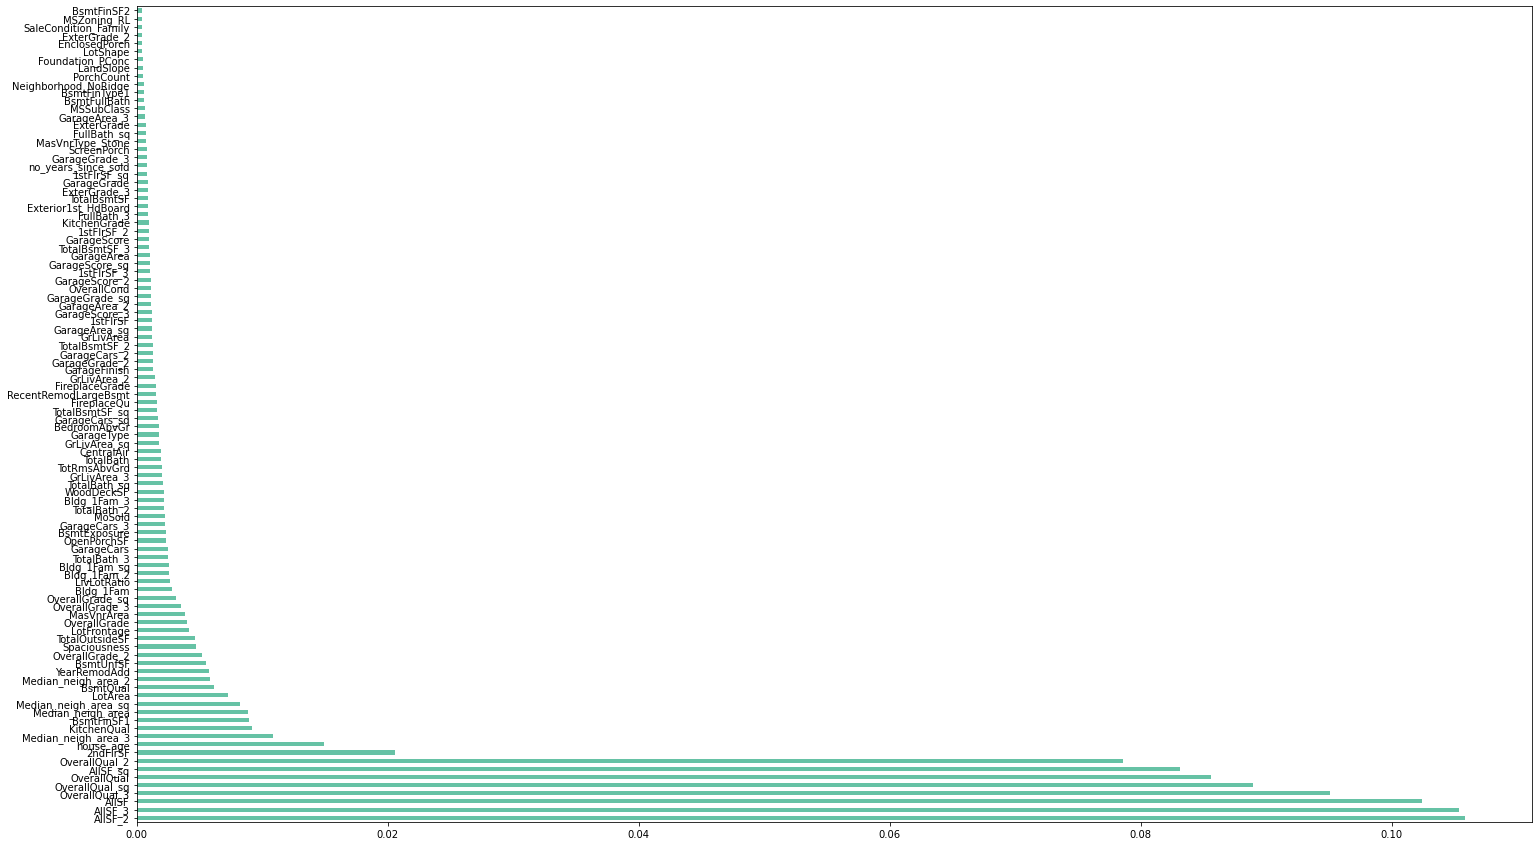

In [56]:
f = plt.figure(figsize=(25, 15))
feat_importances = pd.Series(model_RF.feature_importances_, index=dummy_test.columns)
feat_importances.nlargest(100).plot(kind='barh')

In [58]:
selected_features= feat_importances.sort_values(ascending= False).nlargest(100).index

new_train= dummy_train_df.copy()
new_train= new_train[selected_features]

new_test= dummy_test.copy()
new_test= new_test[selected_features]

In [59]:
train_scaled_features = StandardScaler().fit_transform(new_train)
test_scaled_features = StandardScaler().fit_transform(new_test)
X_train, X_valid, y_train, y_valid= train_test_split(train_scaled_features, y_clean, test_size= 0.2, random_state= 2)

In [60]:
start = time.time()
rmse_LR= score_dataset_LR(X_train, X_valid, y_train, y_valid)
LR_training_time= time.time() - start
rmse_LR

0.011102902084492912

In [61]:
start = time.time()
rmse_RF= score_dataset_RF(X_train, X_valid, y_train, y_valid)
RF_training_time= time.time() - start
rmse_RF

0.13625917230866144

In [67]:
model_LR = LinearRegression()
model_LR.fit(train_scaled_features, y_clean)

start = time.time()

test_preds = model_LR.predict(test_scaled_features)

LR_inference_time= time.time() - start

In [63]:
model_RF = RandomForestRegressor(random_state=50)
model_RF.fit(train_scaled_features, y)

start = time.time()

test_preds2 = model_RF.predict(test_scaled_features)

RF_inference_time= time.time() - start

In [64]:
results = pd.DataFrame({'Models':['Linear Regression','Random Forest'], 'Training time':[LR_training_time, RF_training_time], 
                          'Inference time':[LR_inference_time, RF_inference_time], 'rmse':[rmse_LR, rmse_RF]})
results

,Models,Training time,Inference time,rmse
0,Linear Regression,0.025178,0.004846,0.011103
1,Random Forest,3.883183,0.038340,0.136259


Reducing the dimension of the dataset using feature importances improved the linear regression model performance by 99.1%, decreased the training time by 57.1% and the inference time by 12.5%.

For model built with random forest, performance improved by 1.4% while training and inference time decreased by 25.2% and 1.6% respectively.

This shows that high dimensionality makes linear models give a poor performance  unlike tree models. Overall, quality is better than quantity when building machine learning models

In [69]:
file = {'Id': test.iloc[:, 0], 'SalePrice': test_preds2}

submission = pd.DataFrame(file, columns = ['Id', 'SalePrice'])

submission.to_csv('Iowa_base_Submission11.csv', index = False)

The model built with 100 features selected from the random forest model feature importances achieved 0.13997 on the leaderboard.